In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

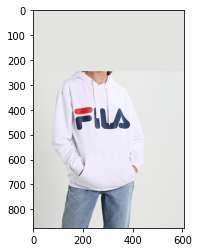

In [14]:
img = cv2.imread("images_no_face/1FI21J00A-A11@10.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [122]:
import os
path = "images/"
files = os.listdir(path)
print(len(files))

1501


In [121]:
import os
path = "replay/"
copy = "images_copy/"
files = os.listdir(path)
for i, file in enumerate(files):
    img = cv2.imread(copy + file)
    print(path + file)
    cascade_path = "haarcascade_frontalface_default.xml"
    gry_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cascade = cv2.CascadeClassifier(cascade_path)
    facerect = cascade.detectMultiScale(gry_img, scaleFactor=1.1, minNeighbors=0, minSize=(30, 30))
    if len(facerect) > 0:
        rect = facerect[0]
        y = rect[0:2]+rect[2:4]
        back_color = [ int(i) for i in img[int(rect[2:4][0]/20)][rect[2:4][1]]]
        back_color = (back_color[0], back_color[1], back_color[2])
        cv2.rectangle(img, tuple([0, 0]), tuple([len(img[0]), y[1]]), back_color, -1)
    cv2.imwrite(path + file, img)

replay/ANP21J000-K11@8.jpg
replay/R5921J058-J11@6.1.jpg
replay/LE221J01D-A11@8.jpg
replay/WEB21J002-Q11@15.1.jpg
replay/M0Q21J02H-N11@8.jpg
replay/LE221J01D-A12@8.jpg
replay/WEB21J014-T11@8.jpg
replay/THJ21J004-T11@8.jpg
replay/JV421J02T-G11@15.jpg


In [143]:
import os
path = "images_no_face/"
copy = "upload/"
files = os.listdir(path)
for i, file in enumerate(files):
    s_zero = str(i+1).zfill(4)
    img = cv2.imread(path + file)
    cv2.imwrite(copy + s_zero + "_" + file, img)

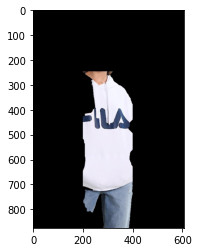

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
from PIL import Image
def resize_image(filepath, width, height):
    img = Image.open(filepath)
    img.thumbnail((width, height),resample=Image.BICUBIC)
    return img
IMG_BASE_PATH = 'images_no_face/'
filename = '1FI21J00A-A11@10.jpg'
WIDTH = 1000
HEIGHT = 1000
file_path =  'images_no_face/1FI21J00A-A11@10.jpg'
pillow_img = resize_image(file_path, WIDTH, HEIGHT)
resized_image_path = f'resized_{filename}'
pillow_img.save(resized_image_path)
img = cv2.imread(resized_image_path)
# 引数はx座標, y座標, 幅, 高さ
#rect = (1,1, int(pillow_img.size[0]),pillow_img.size[1])
rect = (200,1, int(200),pillow_img.size[1])
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()